# Questão 5
Considere o problema de reconhecimento de padrões constituído neste caso de uma deep learning capaz de reconhecer os números (0, 1, ..., 9) mesmo que estes tenham um pequeno giro de até 10 graus. Avalie o desempenho de sistema gerando a matriz de confusão. Pesquise as base de dados para serem usadas no treinamento.

[Aqui](https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/) você encontrará o mesmo projeto e seu autor original.

Esta rede neural identificará dígitos escritos cursivamente. Os dados de treinamento provêm do banco de dados [MNIST](http://yann.lecun.com/exdb/mnist/), que abriga 70.000 exemplos de imagens classificadas corretamente. Apesar de podermos fazer o download no link anterior, há um forma mais fácil de trabalharmos com ele. Devido a fama do MNIST, a biblioteca Keras traz uma função que baixa os dados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print('Versão do TensorFlow: '+tf.__version__)

Versão do TensorFlow: 1.10.0


## Baixando os dados
A função `load_data()` faz download das imagens e seus rótulos. Depois retorna duas tuplas contendo duas listas cada uma. Os nomes das variáveis são auto-explicativos.

Tamanho da lista de treinamento: 60000
Tamanho da lista de validação: 10000


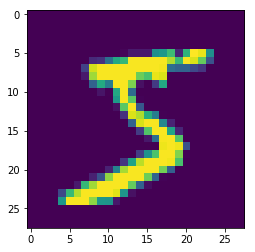

In [2]:
mnist = tf.keras.datasets.mnist
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()
print('Tamanho da lista de treinamento: '+str(len(x_treino)))
print('Tamanho da lista de validação: '+str(len(x_teste)))
plt.imshow(x_treino[0])
plt.show()

OBS.: Todas as imagens aqui têm dimensões 28x28.

A lista `y_treino` armazena o rótulo de cada dado em `x_treino`. O mesmo ocorre nas listas de teste.

In [3]:
print('Rótulo da imagem acima (x_treino[0]): '+str(y_treino[0]))

Rótulo da imagem acima (x_treino[0]): 5


## Pré-processamento
Em nosso conjunto de dados, todas imagens monocromáticas usam valores no intervalo $[0, 255] \in Z$ para representar as 256 tons de uma cor. Vamos normalizar esses valores para $[0,1] \in R$.

In [4]:
x_treino = tf.keras.utils.normalize(x_treino, axis=1)
x_teste = tf.keras.utils.normalize(x_teste, axis=1)

Para demonstrar que a imagem permanece igual, vamos imprimi-la. Com a adição de um novo argumento no `imshow()`, veremos ela em escala de cinza.

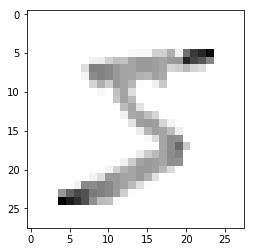

In [5]:
plt.imshow(x_treino[0], cmap=plt.cm.binary)
plt.show()

## Costruindo o modelo da rede neural
Na biblioteca Keras, as redes são objetos chamados de **modelos**. O modelo que queremos construir é a [Multi-Layer Perceptron](https://juliocprocha.files.wordpress.com/2017/11/imagem_1.jpg) tradicional, que no código é denominada `Sequential()`. Logo temos:

In [6]:
model = tf.keras.models.Sequential()

Vamos criar uma camada com a função `add()`. Visto que esta é a primeira, o Keras já sabe que ela é a entrada da rede e não são neurônios. Por isso, não há necessidade de especificar nada sobre quantidade, função ativadora, etc.

O que faremos por agora é "alertar" ao modelo que a entrada deve ser transformada numa lista unidimencional. A matriz 28x28 será redimensionada para um vetor 1x784.

In [7]:
model.add(tf.keras.layers.Flatten())

Criando outra camada com 128 neurônios com função de ativação `ReLU()`. 
$$
ReLU(x) = max(0, x)
$$

In [8]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Última camada terá invariavelmente 10 neurônios, cada um representando um dos 10 algarismos arábicos.

A próxima função de ativação é bem comum na última camada de redes neurais.

In [9]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Usar a **Softmax** como função de ativação faz com que os valores resultantes em cada neurônio seja na verdade a probabilidade da entrada pertencer a classe que ele representa. A softmax transforma as saídas de cada classe para valores entre 0 e 1 e também divide pela soma das saídas.

$$
\sigma(z)_j = \dfrac{e^{z_ j}}{\sum_{k=1}^{K}e^{z_ k}}
$$
$z$ é o valor no neurônio antes da ativação

$j$ é o índice do neurônio de saída

$k$ é o índice de todos os neurônios em um nível

Construção completa.

## Compilando e treinando a rede
O último passo é "compilar" a rede, segundo o linguajar da biblioteca. Na prática isso significa passar as configurações de como será o treinamento e a otimização. 

De acordo com a [documentação](https://keras.io/models/model/) da função `compile()`, podemos fornecer os parâmetros: 
* [Optimizer](https://faroit.github.io/keras-docs/0.2.0/optimizers/)
* [Loss](https://keras.io/losses/)
* [Metrics](https://keras.io/metrics/)
* Loss_weights
* Sample_weight_mode
* Weighted_metrics
* Target_tensors

Só nos interessam os 3 primeiros. Nos links acima pode-se consultar o que tudo isso significa.

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

O método `fit()` é o último passo para treinar. Nela, passamos as entradas da rede neural e seus respectivos rótulos. Baseando-se neste conjunto de entradas, os pesos serão calculados para minimizar o erro em relação às respostas em `y_treino`.

In [11]:
model.fit(x_treino, y_treino, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 15s 246us/step - loss: 0.3161 - acc: 0.9136
Epoch 2/3
60000/60000 [==============================] - 16s 261us/step - loss: 0.1413 - acc: 0.9589
Epoch 3/3
60000/60000 [==============================] - 14s 234us/step - loss: 0.0963 - acc: 0.9711


## Avaliando desempenho

Usaremos as 10.000 amostras destinadas a validação guardadas em `x_teste`. Para sabermos se a rede aprendeu mesmo ou se memorizou o treinamento. é importante não usar amostrar usadas no treinamento.

Faremos isso usando a função `evaluate()` da classe `Model`. Ela retorna dois escalares: um que representa a perda; o outro, precisão.

In [12]:
val_perd, val_prec = model.evaluate(x_teste, y_teste)
print('Perda: {:2.2f}%'.format(val_perd*100))
print('Precisão: {:2.2f}%'.format(val_prec*100)+' dos testes foram rotulados corretamente.')

10000/10000 [==============================] - 2s 159us/step
Perda: 10.81%
Precisão: 96.61% dos testes foram rotulados corretamente.


## Matriz de confusão
Precisaremos da função `predict()` para construir a matriz de confusão. Ela recebe um dado, imagem no caso, e retorna o rótulo calculado pela rede neural. Usaremos a versão que opera sob um array inteiro e retorna o array de resposta.

A matriz $C$ resultante é uma 10x10. Na qual o elemento $c_{ij}$ corresponde a quantidade de vezes que o número i foi classificado como j. O elemento $c_{12}$ guarda quantas vezes o dígito 1 foi classificado como 2. Por isso, o ideal seria uma matriz com valores nulos em todas as posições fora da diagonal principal.

In [13]:
rotulos = model.predict_classes(x_teste)
confusao = np.zeros((10,10))  # Inicializa matriz de zeros

for i in range(len(rotulos)):  # Realiza contagem
    confusao[rotulos[i]][y_teste[i]] += 1



O código abaixo é necessário para exibir a matriz com o mapeamento de cor e os valores em cada elemento.

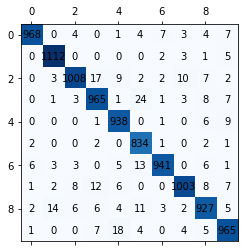

In [14]:
fig, ax = plt.subplots()
ax.matshow(confusao, cmap=plt.cm.Blues)

for i in range(10):
    for j in range(10):
        c = confusao[j,i]
        ax.text(i, j, str(int(c)), va='center', ha='center')
